In [2]:
import pandas as pd
from data import constants
from mathutil import comp, percentage, analyze
from plotutil import stackedbar


In [23]:

df = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining\Results.xlsx")
df.fillna("", inplace=True)
cr_bro = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining - Chromyl\Results.xlsx")
df = pd.concat([df, cr_bro])
dataset = df.loc[(df["Type"] == "Corrphycene")]# & (df["Class"] != "Corrole")]
# dataset = df.loc[(df["Type"] !=  "Porphyrin")]
dataset.reset_index(drop=True, inplace=True)
dataset = percentage.createPercData(dataset)
dataset = comp.createCompData(dataset)
dataset = percentage.createCompPercData(dataset)
dataset = comp.createSumData(dataset)
dataset = percentage.createSumPercData(dataset)
dataset["dominant"] = dataset[constants.compColumns].idxmax(axis=1)
len(dataset)

c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\percentage.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + "%"] = df[col].abs()/sum
c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\comp.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + " comp"] = __compValue(df[col+"1"], df[col + "2"])
c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\percentage.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

24

In [4]:
from matplotlib import pyplot as plt
from plotutil.misc import cm_to_inch
! pip install SciencePlots


In [5]:
plt.style.use(['science', 'nature', 'no-latex'])
plt.rcParams["figure.figsize"] = (cm_to_inch(16), cm_to_inch(13))
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["axes.titlesize"] = 9
plt.rcParams["xtick.labelsize"] = 9
plt.rcParams["ytick.labelsize"] = 9
plt.rcParams["font.family"] = "Arial"


(<Figure size 7559.06x6141.73 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\it{Anzahl}$ $\\it{Strukturen}$'}, xlabel='$\\mathregular{D_{oop}}$ /Å'>)

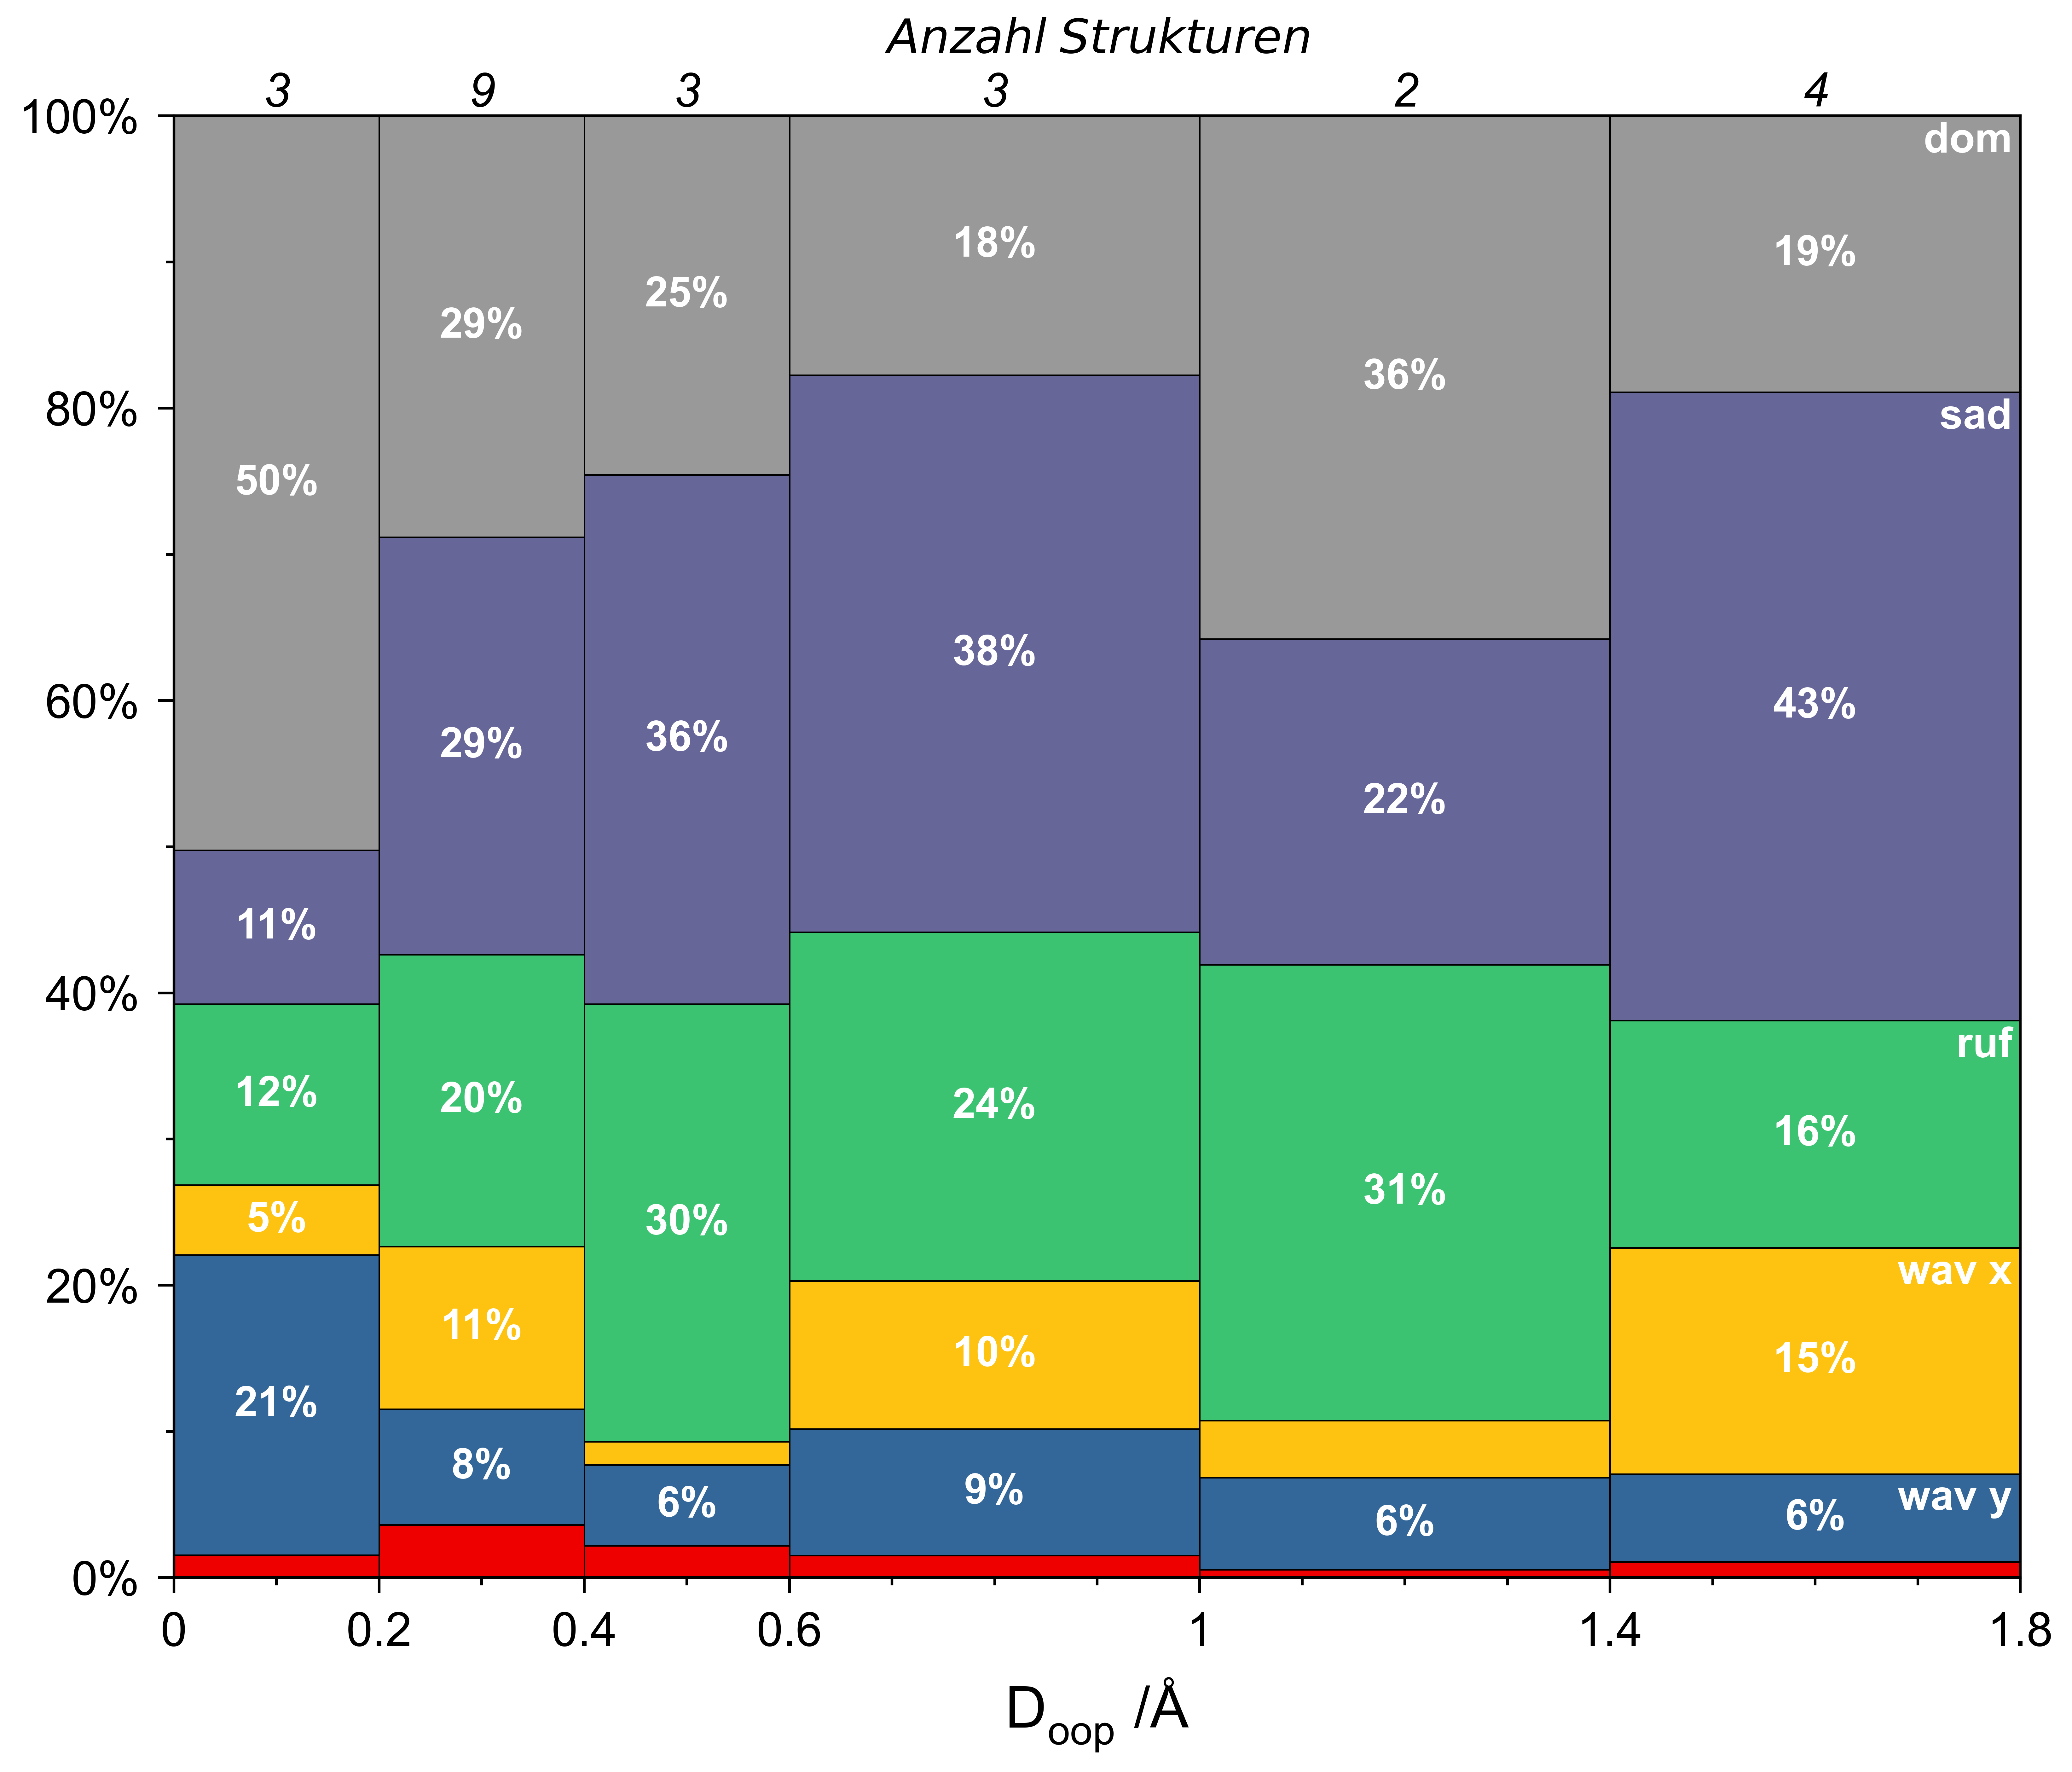

In [29]:
# range = [.3,.5,.7,.8,.9, 1, 1.2, 1.8, 1000]
range = [.2,.4,.6 ,1, 1.4, 1.8,1000]
cols = constants.percCompColumns
bins = analyze.fieldAnalysis(dataset, range, cols, "DoopExp")
stackedbar.plot_doop(bins, range, cols)

(<Figure size 7559.06x6141.73 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\it{Anzahl}$ $\\it{Strukturen}$'}, xlabel='$\\mathregular{D_{oop}}$ /Å'>)

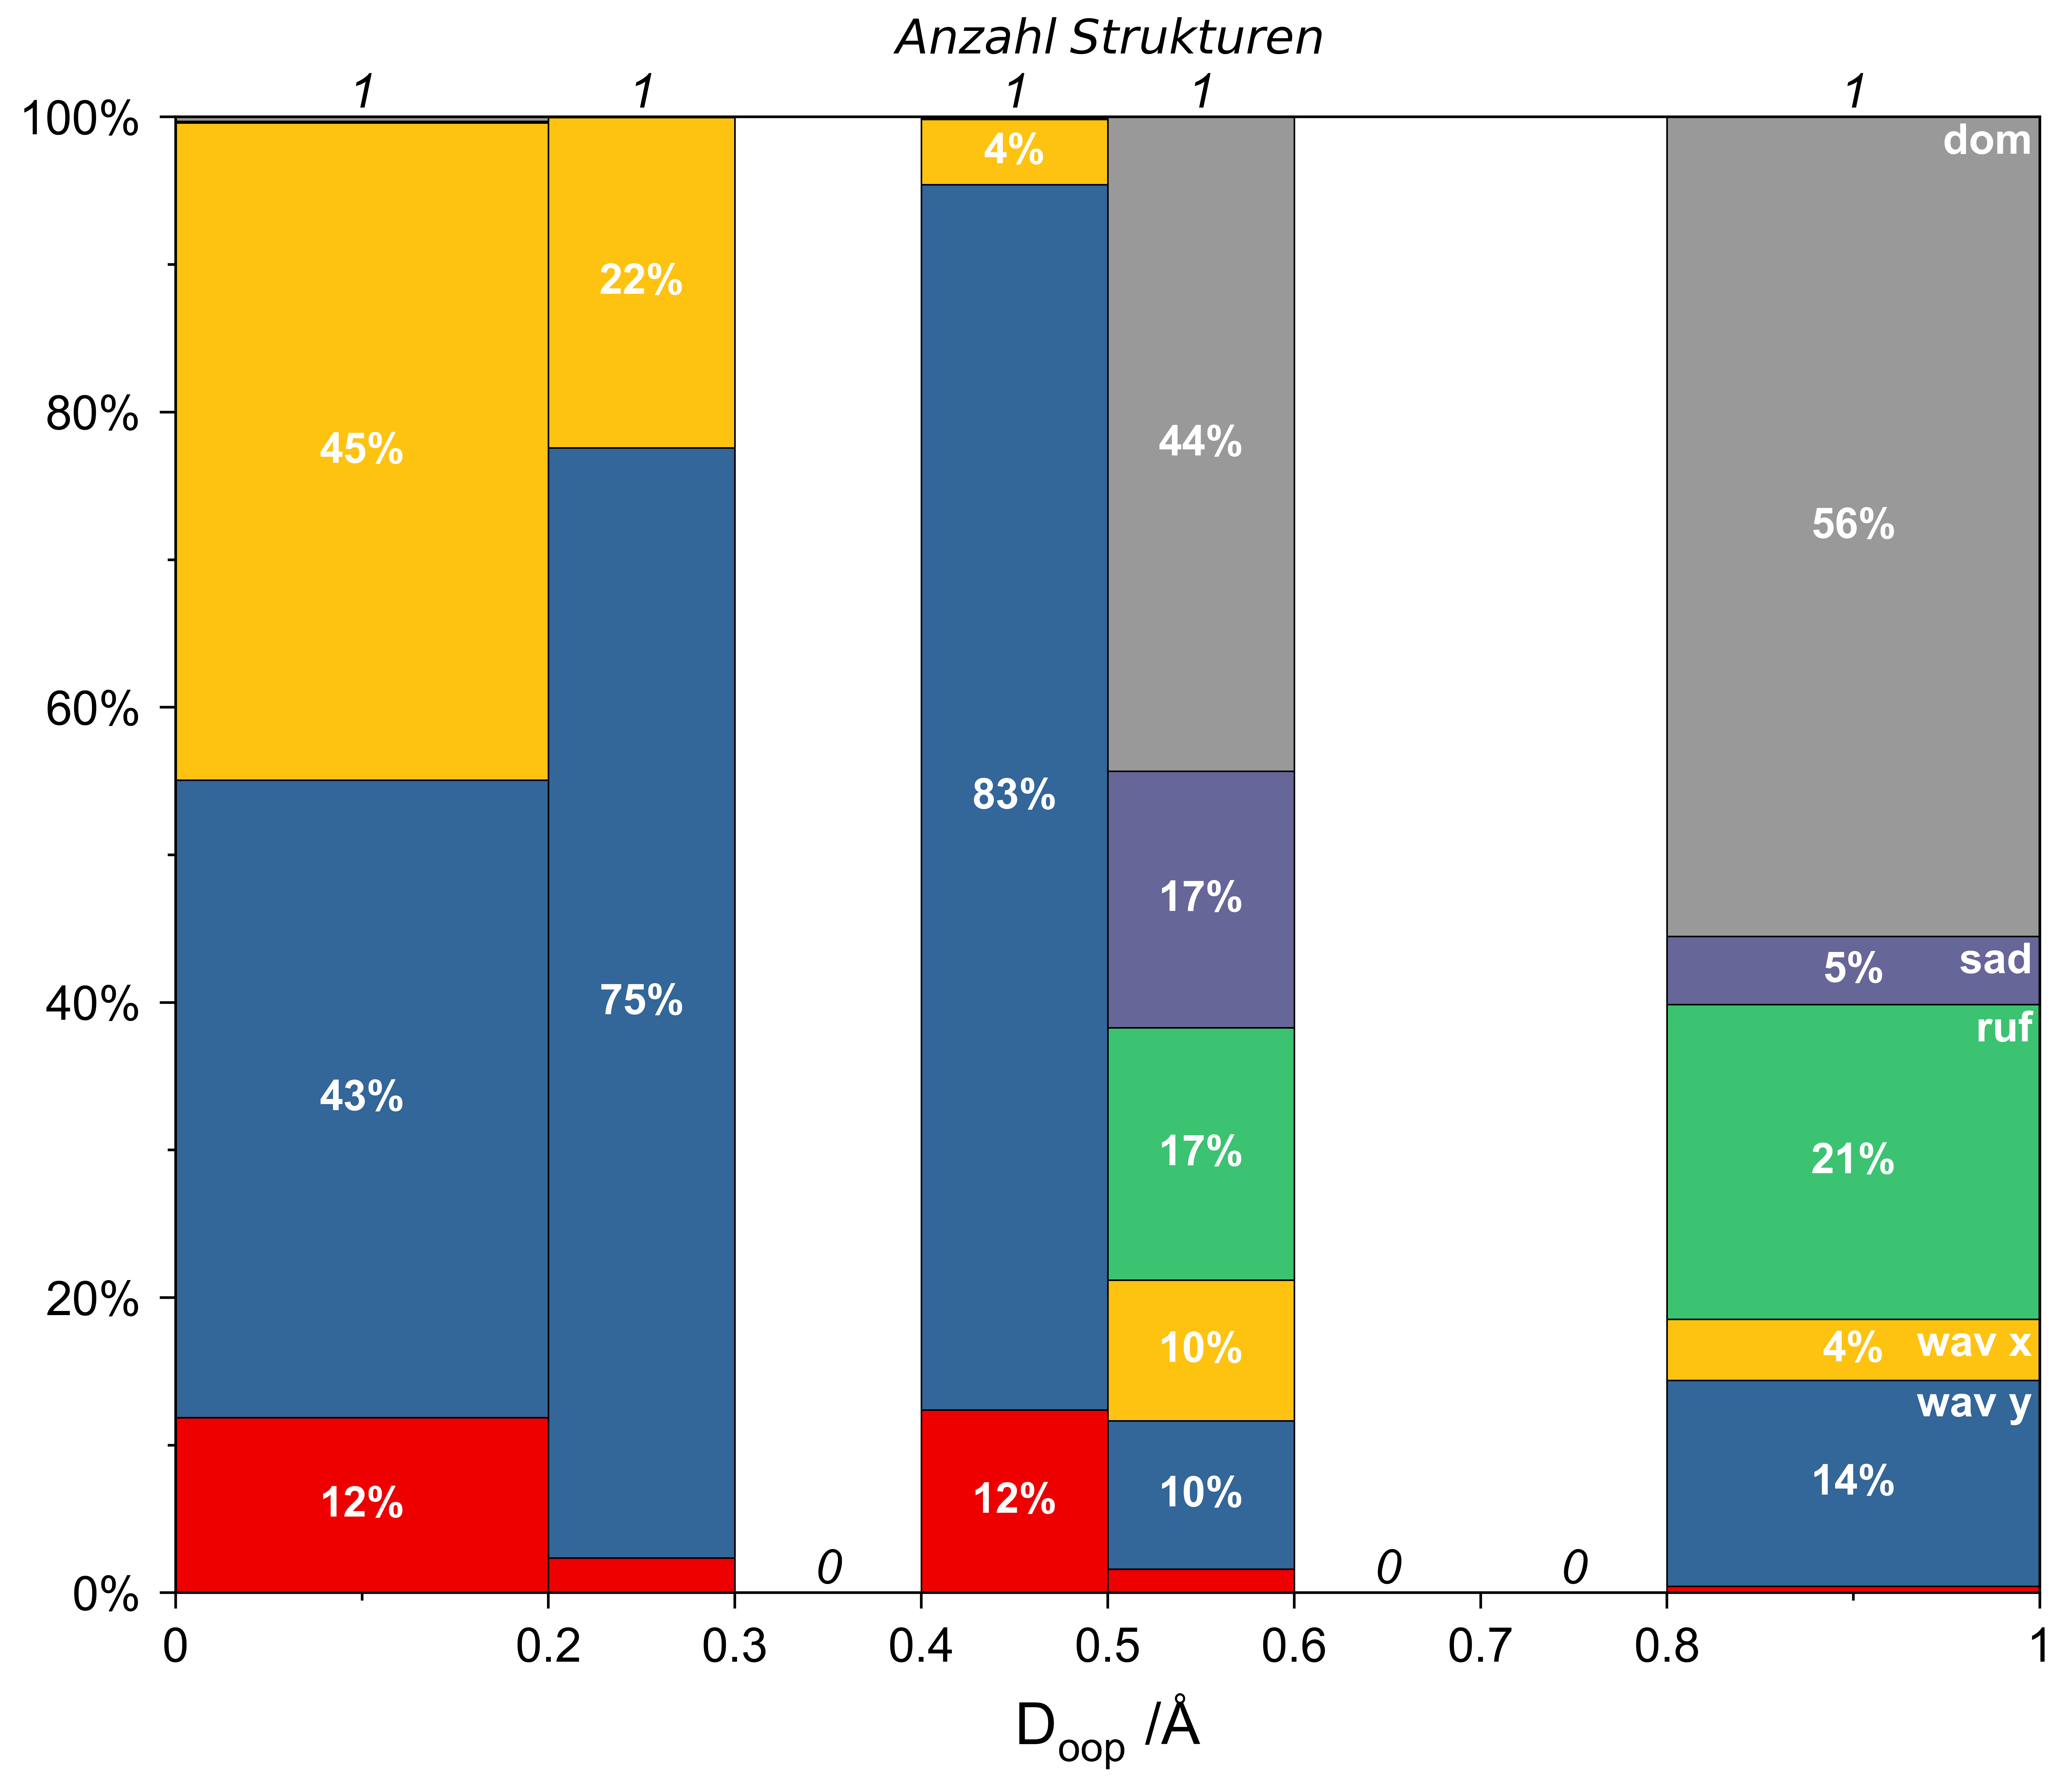

In [7]:
metals = ["B", "Al", "Ga", "In", "Tl", "Si", "Ge", "Sn", "Pb", "P", "As", "Sb", "Bi"]
hg = dataset.loc[dataset["Metal"].isin(metals)]
range = [0.2, .3,.4,.5, .6,.7, .8, 1, 1000]
cols = constants.percCompColumns
bins = analyze.fieldAnalysis(hg, range, cols, "DoopExp")
stackedbar.plot_doop(bins, range, cols)

(<Figure size 7559.06x6141.73 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\it{Anzahl}$ $\\it{Strukturen}$'}, xlabel='$\\mathregular{D_{oop}}$ /Å'>)

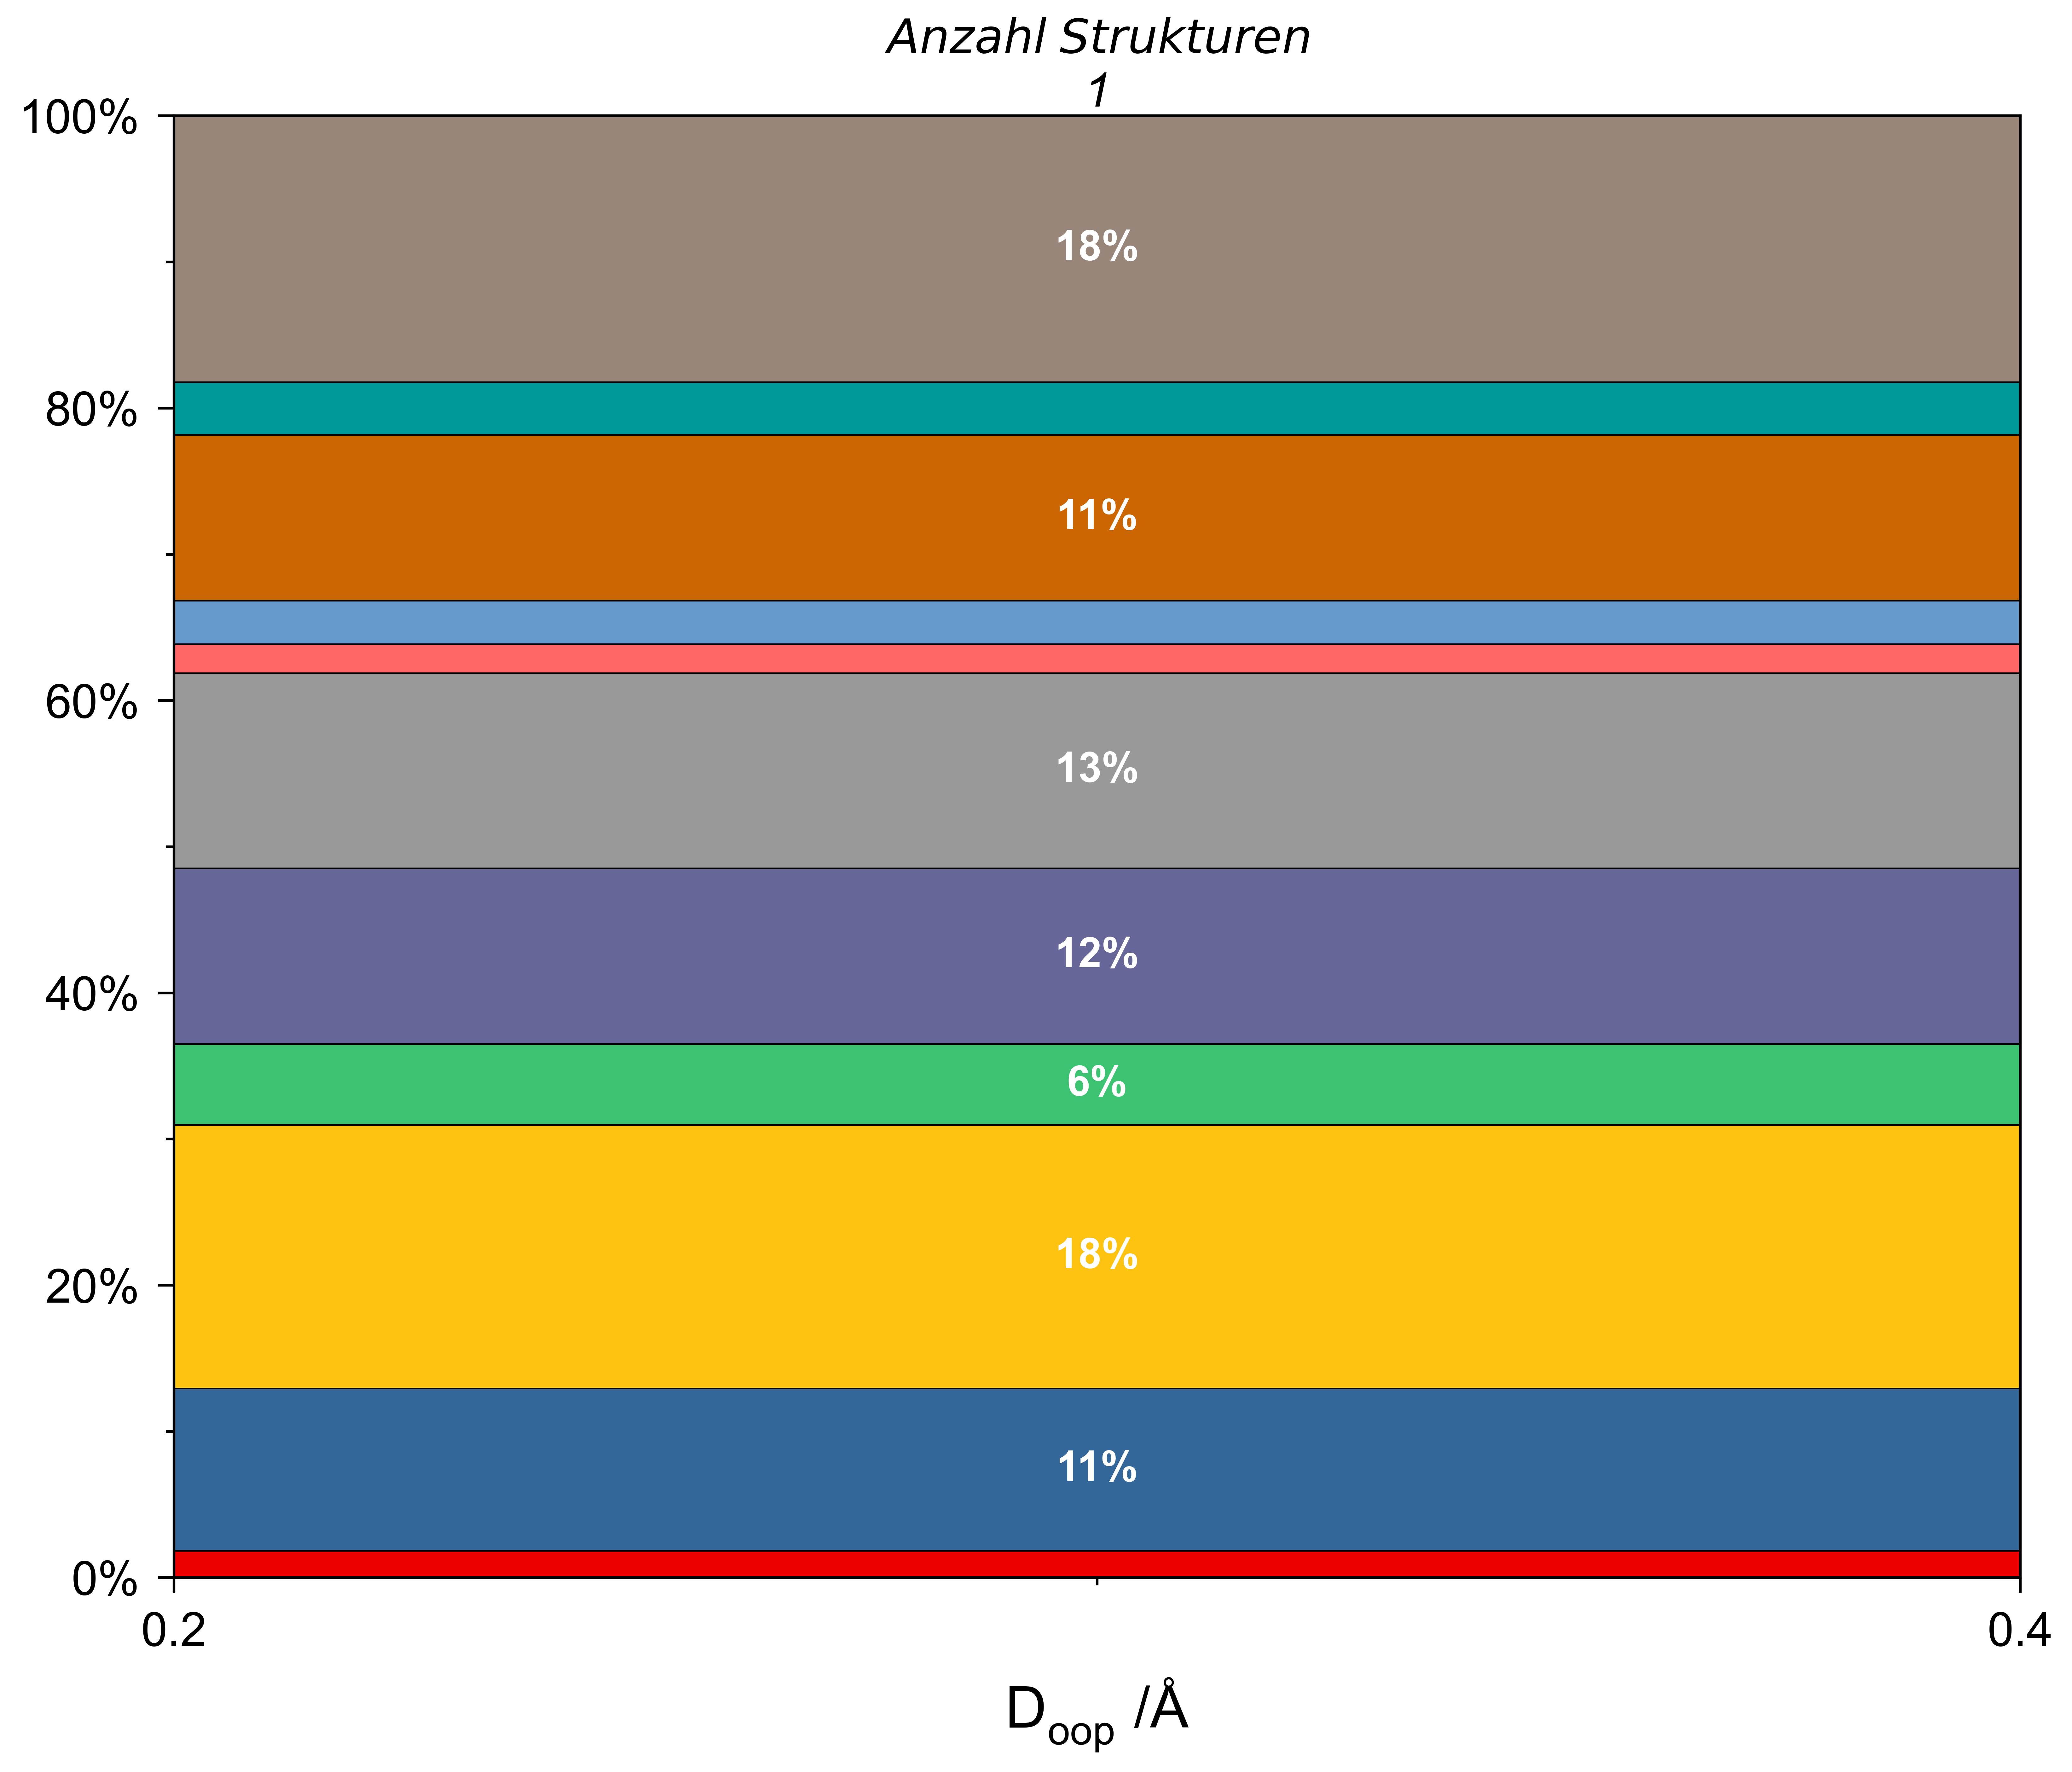

In [8]:

g = dataset.loc[dataset["Metal"] == "Cu"]
range = [.2,  .4, .6, 1000] #.8, 1, 1.2,1.5, 2.0, 2.5, 1000]
cols = constants.percColumns
bins = analyze.fieldAnalysis(g, range, cols, "DoopExp")
stackedbar.plot_doop(bins, range, cols)